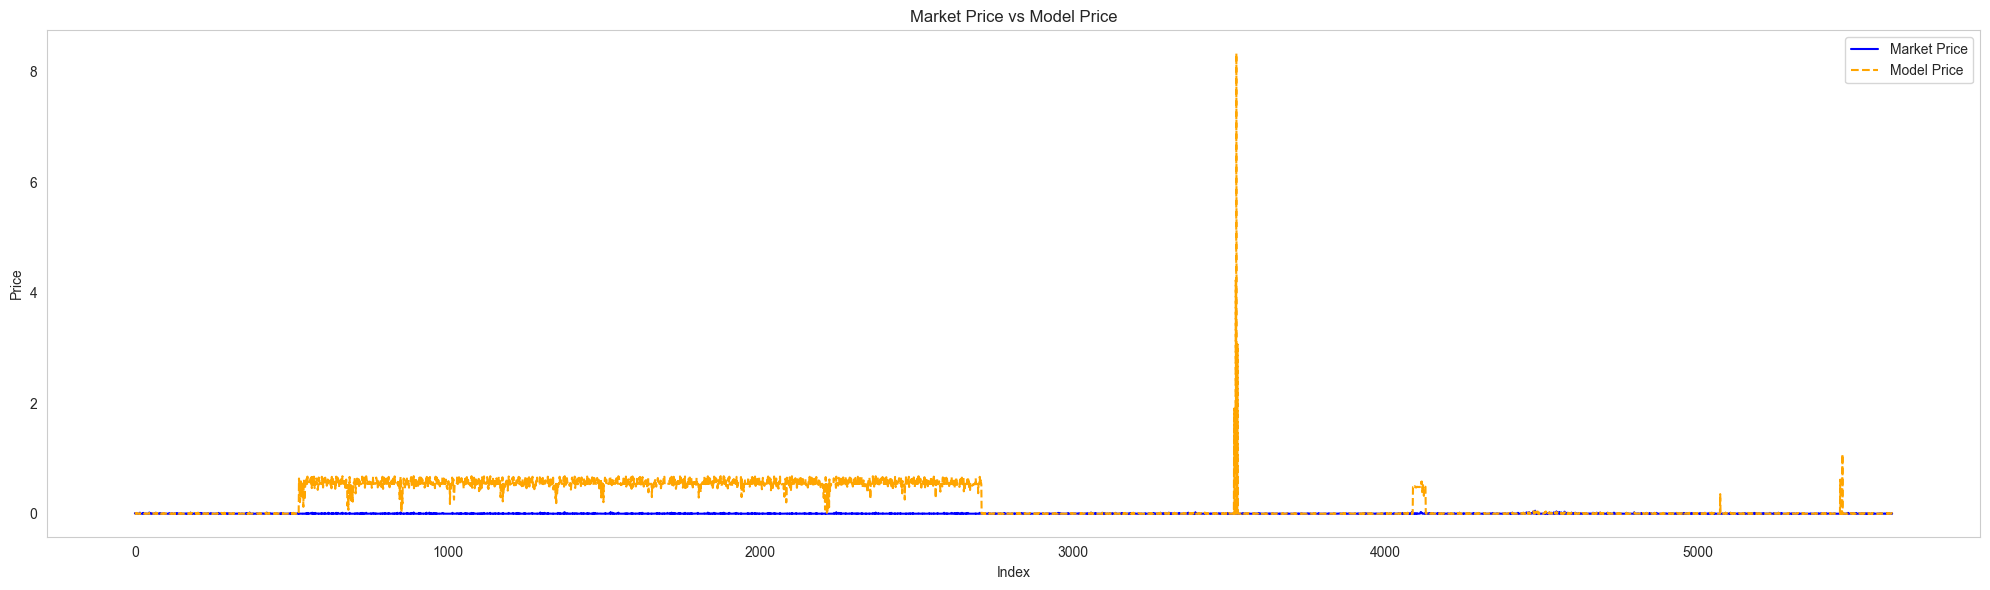

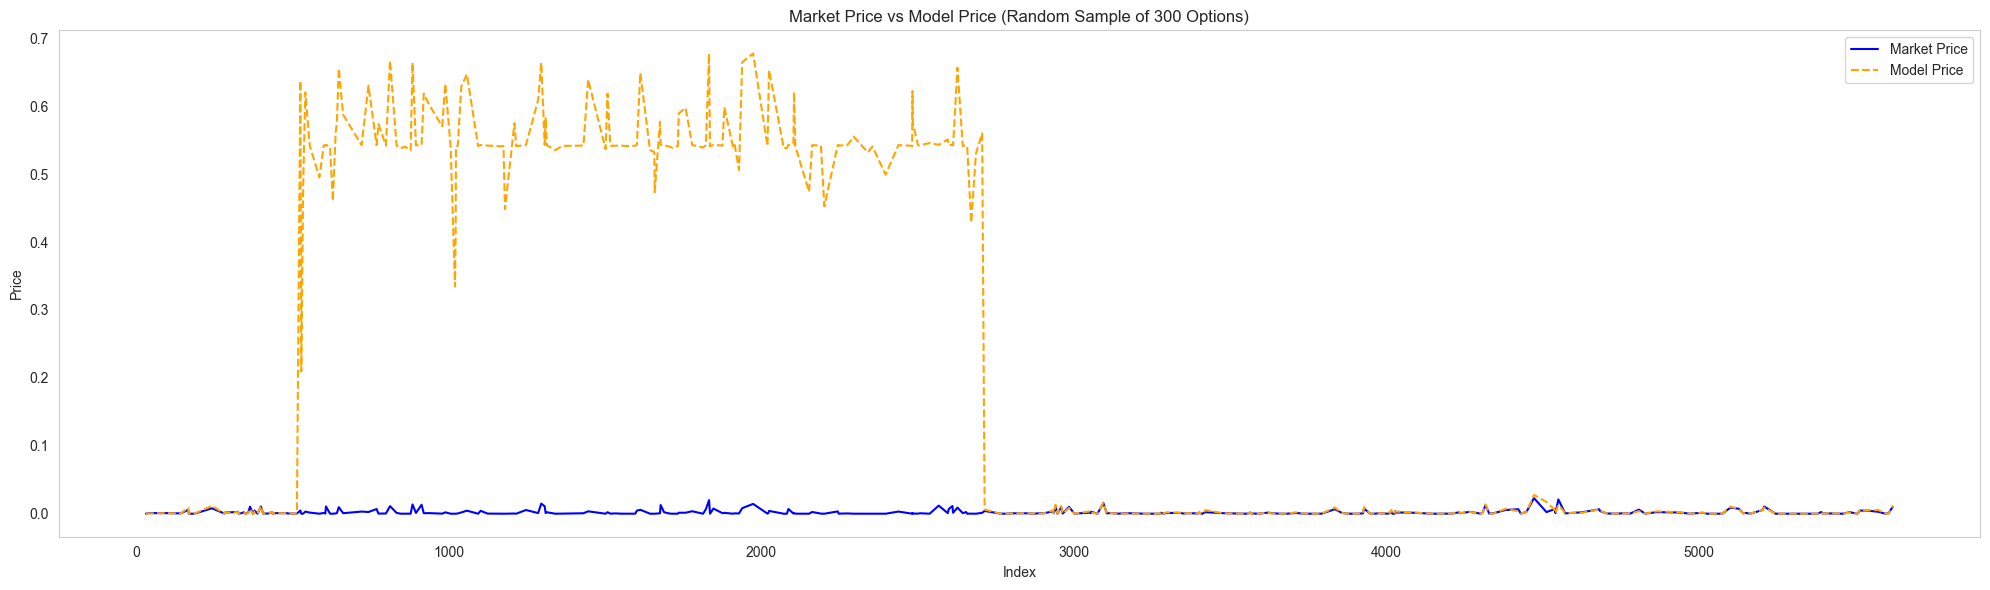

In [26]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

path = '/Users/joris/Documents/Master QF/Thesis/optimal-gamma-hedging/COS_Pricers/Data/merton_option_details.csv'
df = pd.read_csv(path)
df['model_price'] = df['model_price']/df['spot']
df['abs_moneyness'] = np.where(df['opt_type'] == 'call', df['spot'] - df['strike'], df['strike'] - df['spot'])

# Plot model price against market price
plt.figure(figsize=(20, 6))
plt.plot(df['mark_price'], label='Market Price', linestyle='-', color='blue')
plt.plot(df['model_price'], label='Model Price', linestyle='--', color='orange')
plt.title('Market Price vs Model Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

sample_df = df.sample(n=300).sort_index()

plt.figure(figsize=(20, 6))
plt.plot(sample_df['mark_price'], label='Market Price', linestyle='-', color='blue')
plt.plot(sample_df['model_price'], label='Model Price', linestyle='--', color='orange')
plt.title('Market Price vs Model Price (Random Sample of 300 Options)')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

    

In [23]:
columns_to_keep = ['mark_iv', 'model_iv', 'mark_price', 'bid_price', 'ask_price', 'moneyness', 'moneyness_class', 'model_price', 'strike', 'time_to_maturity']
# Keep only columns that exist in the dataframe
columns_present = [col for col in columns_to_keep if col in df.columns]
df = df[columns_present]
df.head(50)

,mark_iv,model_iv,mark_price,bid_price,ask_price,moneyness,moneyness_class,model_price,strike,time_to_maturity
0,69.79,0.779808,9.701600e-03,0.0090,0.0100,0.034064,ATM,4.693343e-03,53000,0.00274
1,75.88,0.820892,2.245000e-03,0.0015,0.0025,-0.024205,ATM,7.595876e-03,50000,0.00274
2,113.15,NaN,8.734000e-05,NaN,0.0010,-0.129565,OTM,2.643124e-04,45000,0.00274
3,77.46,0.767925,8.971600e-04,0.0005,0.0015,0.089124,OTM,1.954705e-04,56000,0.00274
4,89.68,0.764214,2.706500e-04,NaN,0.0005,0.124215,OTM,1.115607e-05,58000,0.00274
5,81.61,0.855126,1.019290e-03,0.0005,0.0015,-0.044407,ATM,3.701610e-03,49000,0.00274
6,72.12,0.800337,5.124610e-03,0.0045,0.0055,-0.004402,ATM,1.457016e-02,51000,0.00274
7,69.89,0.774447,4.326640e-03,0.0040,0.0050,0.052756,OTM,1.888745e-03,54000,0.00274
8,72.89,0.770680,1.916550e-03,0.0015,0.0025,0.071105,OTM,6.549952e-04,55000,0.00274
9,113.12,NaN,2.687900e-04,NaN,0.0005,-0.107586,OTM,5.170586e-04,46000,0.00274


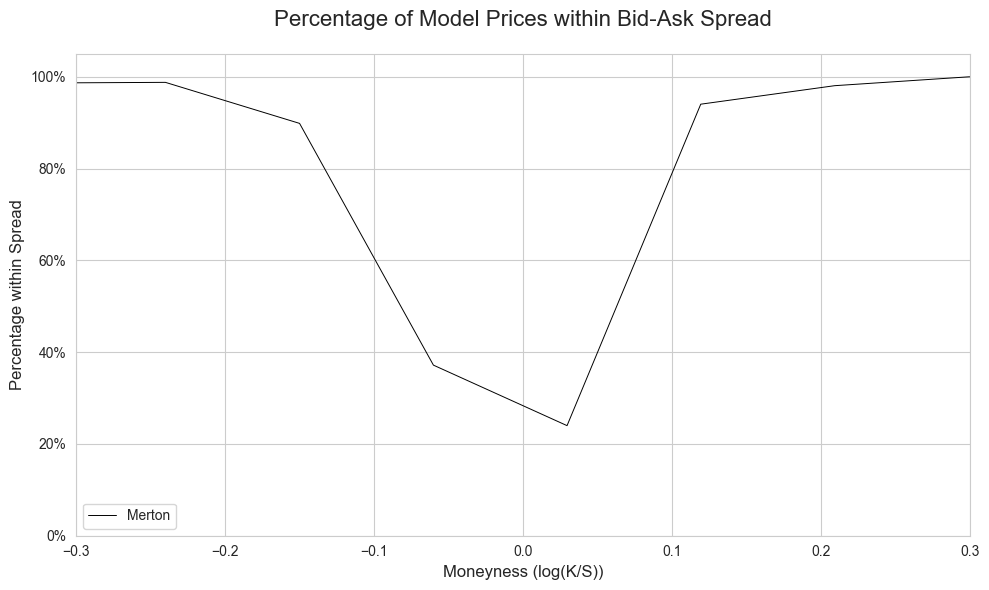

In [24]:
# Bin Moneyness
df['moneyness_bin'] = pd.cut(df['moneyness'], bins=40)

# Check if model price is within spread OR if bid/ask is NaN
df['model_in_spread'] = (
    df['model_price'].between(df['bid_price'], df['ask_price']) |
    df['bid_price'].isna() |
    df['ask_price'].isna()
).astype(int)

# Group and aggregate data
model_performance = df.groupby('moneyness_bin', observed=True)['model_in_spread'].mean().reset_index()
model_performance['moneyness_midpoint'] = model_performance['moneyness_bin'].apply(lambda x: x.mid)

# Plotting
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.lineplot(
    x='moneyness_midpoint',
    y='model_in_spread',
    data=model_performance,
    label='Merton', 
    color='black',
    linewidth=0.7
)

plt.title('Percentage of Model Prices within Bid-Ask Spread', fontsize=16, pad=20)
plt.xlabel('Moneyness (log(K/S))', fontsize=12)
plt.ylabel('Percentage within Spread', fontsize=12)

# Format the y-axis to show percentages and set limits
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))
plt.ylim(0, 1.05)
plt.xlim(-0.3, 0.3)

plt.legend()
plt.tight_layout()
plt.show()